<a href="https://colab.research.google.com/github/Rudraps07/Nifty-fifty-stock-market-prediction-model/blob/main/DT_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
print("import complete")

import complete


In [ ]:
df = pd.read_excel('data (2).xlsx')
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover
0,2021-08-31,16947.50,17153.50,16915.85,17132.20,464390247,40147.89
1,2021-09-01,17185.60,17225.75,17055.05,17076.25,301894634,27691.93
2,2021-09-02,17095.40,17245.50,17059.70,17234.15,242377518,22620.36
3,2021-09-03,17262.45,17340.10,17212.20,17323.60,261373795,23579.17
4,2021-09-06,17399.35,17429.55,17345.55,17377.80,228045532,21270.62


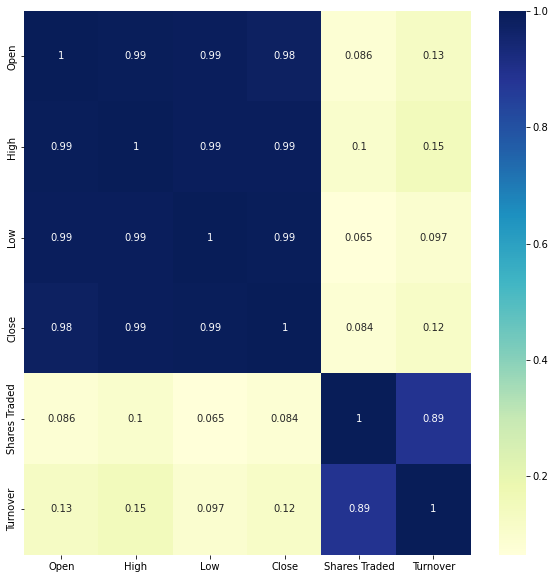

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))  
dataplot = sns.heatmap(df.corr(), cmap="YlGnBu", annot=True)

In [ ]:
data = df[['Date','Open','High','Low','Shares Traded','Turnover']]

In [ ]:
df.set_index("Date", drop=False, inplace=True)

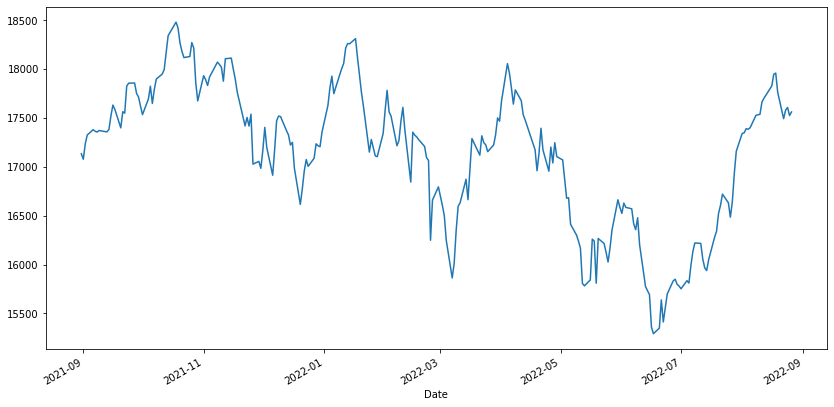

In [ ]:
df.Close.plot(figsize=(14, 7))

In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           247 non-null    datetime64[ns]
 1   Open           247 non-null    float64       
 2   High           247 non-null    float64       
 3   Low            247 non-null    float64       
 4   Shares Traded  247 non-null    int64         
 5   Turnover       247 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 11.7 KB


In [ ]:
df.reset_index(drop=True, inplace=True)
lag_features = ["Open","High", "Low"]
window1 = 4
window2 = 7

df_rolled_3d = df[lag_features].rolling(window=window1, min_periods=0)
df_mean_3d = df_rolled_3d.mean().shift(1).reset_index().astype(np.float32)

df_rolled_7d = df[lag_features].rolling(window=window2, min_periods=0)
df_std_7d = df_rolled_7d.std().shift(1).reset_index().astype(np.float32)

for feature in lag_features:
    df[f"{feature}_mean_lag{window1}"] = df_mean_3d[feature].astype('float32')
    df[f"{feature}_std_lag{window2}"] = df_std_7d[feature].astype('float32')

In [ ]:
df.fillna(df.mean(), inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  """Entry point for launching an IPython kernel.


In [ ]:
df.set_index("Date", drop=False, inplace=True)
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover,Open_mean_lag4,Open_std_lag7,High_mean_lag4,High_std_lag7,Low_mean_lag4,Low_std_lag7
Date,,,,,,,,,,,,,
2021-08-31,2021-08-31,16947.50,17153.50,16915.85,17132.20,464390247,40147.89,17133.507812,203.013016,17226.335938,183.286224,17010.503906,207.852936
2021-09-01,2021-09-01,17185.60,17225.75,17055.05,17076.25,301894634,27691.93,16947.500000,203.013016,17153.500000,183.286224,16915.849609,207.852936
2021-09-02,2021-09-02,17095.40,17245.50,17059.70,17234.15,242377518,22620.36,17066.550781,168.362122,17189.625000,51.088467,16985.449219,98.429260
2021-09-03,2021-09-03,17262.45,17340.10,17212.20,17323.60,261373795,23579.17,17076.166016,120.209579,17208.250000,48.432297,17010.199219,81.742569
2021-09-06,2021-09-06,17399.35,17429.55,17345.55,17377.80,228045532,21270.62,17122.738281,135.310501,17241.212891,76.875854,17060.699219,121.060173


In [ ]:
df.Date = pd.to_datetime(df.Date, format="%d-%m-%Y")
df["month"] = df.Date.dt.month
df["day"] = df.Date.dt.day
df["day_of_week"] = df.Date.dt.dayofweek
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover,Open_mean_lag4,Open_std_lag7,High_mean_lag4,High_std_lag7,Low_mean_lag4,Low_std_lag7,month,day,day_of_week
Date,,,,,,,,,,,,,,,,
2021-08-31,2021-08-31,16947.50,17153.50,16915.85,17132.20,464390247,40147.89,17133.507812,203.013016,17226.335938,183.286224,17010.503906,207.852936,8,31,1
2021-09-01,2021-09-01,17185.60,17225.75,17055.05,17076.25,301894634,27691.93,16947.500000,203.013016,17153.500000,183.286224,16915.849609,207.852936,9,1,2
2021-09-02,2021-09-02,17095.40,17245.50,17059.70,17234.15,242377518,22620.36,17066.550781,168.362122,17189.625000,51.088467,16985.449219,98.429260,9,2,3
2021-09-03,2021-09-03,17262.45,17340.10,17212.20,17323.60,261373795,23579.17,17076.166016,120.209579,17208.250000,48.432297,17010.199219,81.742569,9,3,4
2021-09-06,2021-09-06,17399.35,17429.55,17345.55,17377.80,228045532,21270.62,17122.738281,135.310501,17241.212891,76.875854,17060.699219,121.060173,9,6,0


In [ ]:
df_train = df[df.Date >= "2022"]
df_valid = df[df.Date >= "2022"]


In [ ]:
df_valid.shape

(162, 16)

In [ ]:
!pip install keras
import tensorflow
from sklearn.preprocessing import MinMaxScaler

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_train.head().T

Date,2022-01-03,2022-01-04,2022-01-05,2022-01-06,2022-01-07
Date,2022-01-03 00:00:00,2022-01-04 00:00:00,2022-01-05 00:00:00,2022-01-06 00:00:00,2022-01-07 00:00:00
Open,17387.15,17681.4,17820.1,17768.5,17797.6
High,17646.65,17827.6,17944.7,17797.95,17905.0
Low,17383.3,17593.55,17748.85,17655.55,17704.55
Close,17625.7,17805.25,17925.25,17745.9,17812.7
Shares Traded,200456430,247437472,251460038,236454824,239338015
Turnover,16181.36,18604.16,23737.31,22643.82,21447.89
Open_mean_lag4,17210.912109,17263.300781,17378.625,17533.287109,17664.287109
Open_std_lag7,107.109695,134.337357,227.1241,258.395203,273.400879
High_mean_lag4,17300.261719,17399.363281,17534.775391,17704.9375,17804.224609


In [ ]:
y_train = df_train["Close"]
scaler=MinMaxScaler(feature_range=(0,1))
y_train1=scaler.fit_transform(np.array(df_train['Close']).reshape(-1,1))
y_trainn = df_train["Close"].to_numpy().reshape(-1,1)

In [ ]:
y_valid = df_valid["Close"]
scaler1=MinMaxScaler(feature_range=(0,1))
y_valid1=scaler1.fit_transform(np.array(df_valid['Close']).reshape(-1,1))
y_validn = df_valid["Close"].to_numpy().reshape(-1,1)

In [ ]:
X_train = df_train.drop(columns=["Close"])
X_train1 = X_train.drop("Date", axis=1)
X_train1 = (X_train1-X_train1.min())/(X_train1.max()-X_train1.min())
X_train2 = pd.concat((X_train1, X_train.Date), 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  after removing the cwd from sys.path.


In [ ]:
X_valid = df_valid.drop(columns=["Close"])
X_valid1 = X_valid.drop("Date", axis=1)
X_valid1 = (X_valid1-X_valid1.min())/(X_valid1.max()-X_valid1.min())
X_valid2 = pd.concat((X_valid1, X_valid.Date), 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  after removing the cwd from sys.path.


In [ ]:
X_train3 = X_train2.drop(columns=['Date']).to_numpy()
X_valid3 = X_valid2.drop(columns=['Date']).to_numpy()

In [ ]:
y_train1 = y_train1.reshape(-1,1)
y_valid1 = y_valid1.reshape(-1,1)

In [ ]:
!pip install xgboost
import xgboost as xgb
import sklearn
from xgboost import XGBRegressor
from xgboost import plot_importance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
xgb = XGBRegressor(n_estimators=1000,learning_rate=0.01)
xgb

xgb.fit(X_train3,y_train1,eval_set=[(X_train3,y_train1),(X_valid3,y_valid1)],early_stopping_rounds=100,verbose=True) # Change verbose to True if you want to see it train

[16:07:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.246255	validation_1-rmse:0.246255
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:0.243975	validation_1-rmse:0.243975
[2]	validation_0-rmse:0.241718	validation_1-rmse:0.241718
[3]	validation_0-rmse:0.239483	validation_1-rmse:0.239483
[4]	validation_0-rmse:0.23727	validation_1-rmse:0.23727
[5]	validation_0-rmse:0.235079	validation_1-rmse:0.235079
[6]	validation_0-rmse:0.232903	validation_1-rmse:0.232903
[7]	validation_0-rmse:0.230755	validation_1-rmse:0.230755
[8]	validation_0-rmse:0.228621	validation_1-rmse:0.228621
[9]	validation_0-rmse:0.226514	validation_1-rmse:0.226514
[10]	validation_0-rmse:0.224422	validation_1-rmse:0.224422
[11]	validation_0-rmse:0.222357	validation_1-rmse:0.222357
[12]	validation_0

XGBRegressor(learning_rate=0.01, n_estimators=1000)

<Figure size 864x576 with 0 Axes>

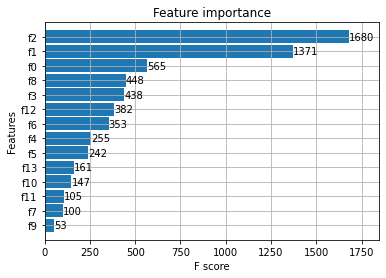

In [ ]:
plt.figure(figsize=(12,8))
feature_importance = plot_importance(xgb, height=0.9)
feature_importance

In [ ]:
predicted_results_v = xgb.predict(X_valid3)
predicted_results_t = xgb.predict(X_train3)
predicted_results_v= predicted_results_v.reshape(-1, 1)
predicted_results_t= predicted_results_t.reshape(-1, 1)
predicted_results_v = scaler1.inverse_transform(predicted_results_v)
predicted_results_t = scaler.inverse_transform(predicted_results_t)

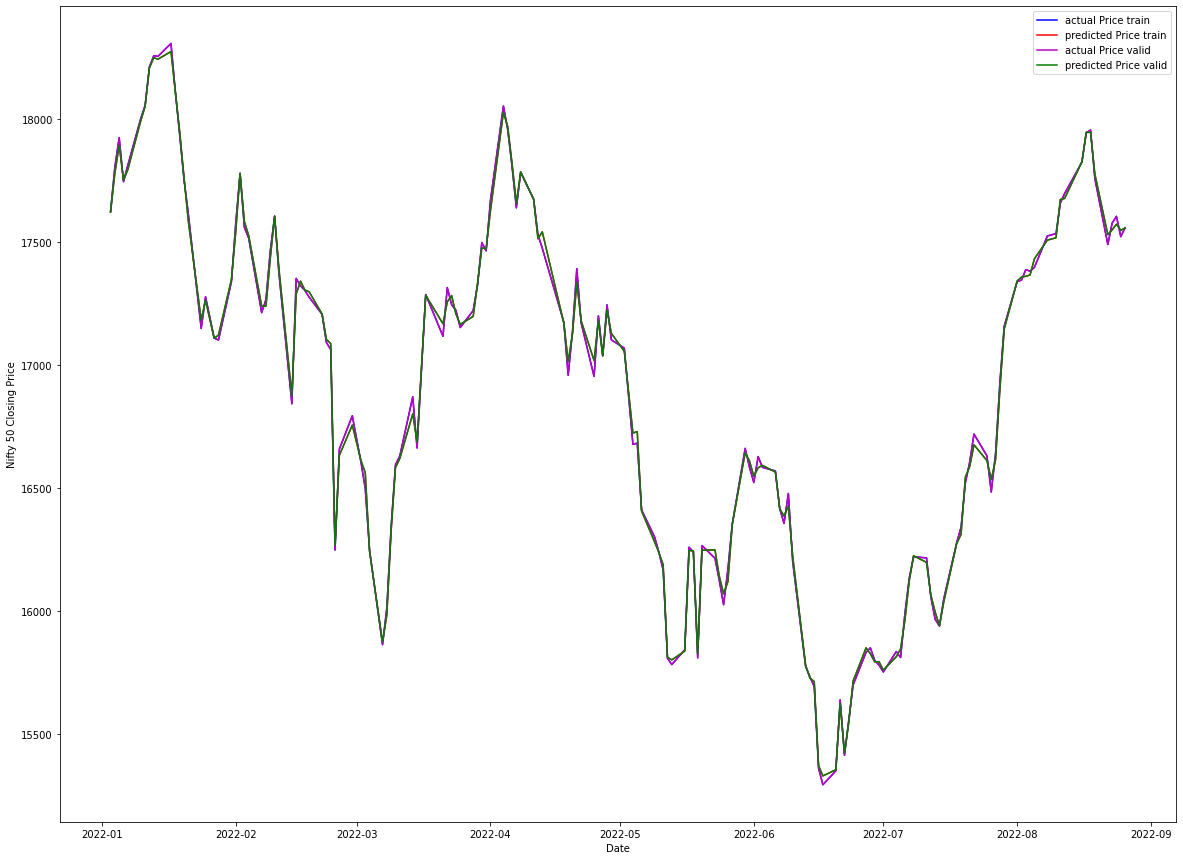

In [ ]:
plt.figure(figsize=(20,15))
plt.plot(X_train2.index,list(y_trainn),label="actual Price train",color='b')
plt.plot(X_train2.index,list(predicted_results_t),label="predicted Price train",color='r')
plt.plot(X_valid2.index,list(y_validn),label="actual Price valid",color='m')
plt.plot(X_valid2.index,list(predicted_results_v),label="predicted Price valid",color='g')

plt.xlabel('Date')
plt.ylabel('Nifty 50 Closing Price')
plt.legend()
plt.show()

In [ ]:
xgb = XGBRegressor(n_estimators=1000,learning_rate=0.0099,max_depth=15)
xgb

xgb.fit(X_train3,y_train1,
        eval_set=[(X_train3,y_train1),(X_valid3,y_valid1)],
        early_stopping_rounds=100,
        verbose=True) # Change verbose to True if you want to see it train

[16:08:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:0.246272	validation_1-rmse:0.246272
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 100 rounds.
[1]	validation_0-rmse:0.24401	validation_1-rmse:0.24401
[2]	validation_0-rmse:0.241769	validation_1-rmse:0.241769
[3]	validation_0-rmse:0.23955	validation_1-rmse:0.23955
[4]	validation_0-rmse:0.237352	validation_1-rmse:0.237352
[5]	validation_0-rmse:0.235176	validation_1-rmse:0.235176
[6]	validation_0-rmse:0.233019	validation_1-rmse:0.233019
[7]	validation_0-rmse:0.230884	validation_1-rmse:0.230884
[8]	validation_0-rmse:0.228771	validation_1-rmse:0.228771
[9]	validation_0-rmse:0.226672	validation_1-rmse:0.226672
[10]	validation_0-rmse:0.224597	validation_1-rmse:0.224597
[11]	validation_0-rmse:0.222539	validation_1-rmse:0.222539
[12]	validation_0-r

XGBRegressor(learning_rate=0.0099, max_depth=15, n_estimators=1000)

In [ ]:
predicted_results_v = xgb.predict(X_valid3)
predicted_results_t = xgb.predict(X_train3)
predicted_results_v= predicted_results_v.reshape(-1, 1)
predicted_results_t= predicted_results_t.reshape(-1, 1)
predicted_results_v = scaler1.inverse_transform(predicted_results_v)
predicted_results_t = scaler.inverse_transform(predicted_results_t)

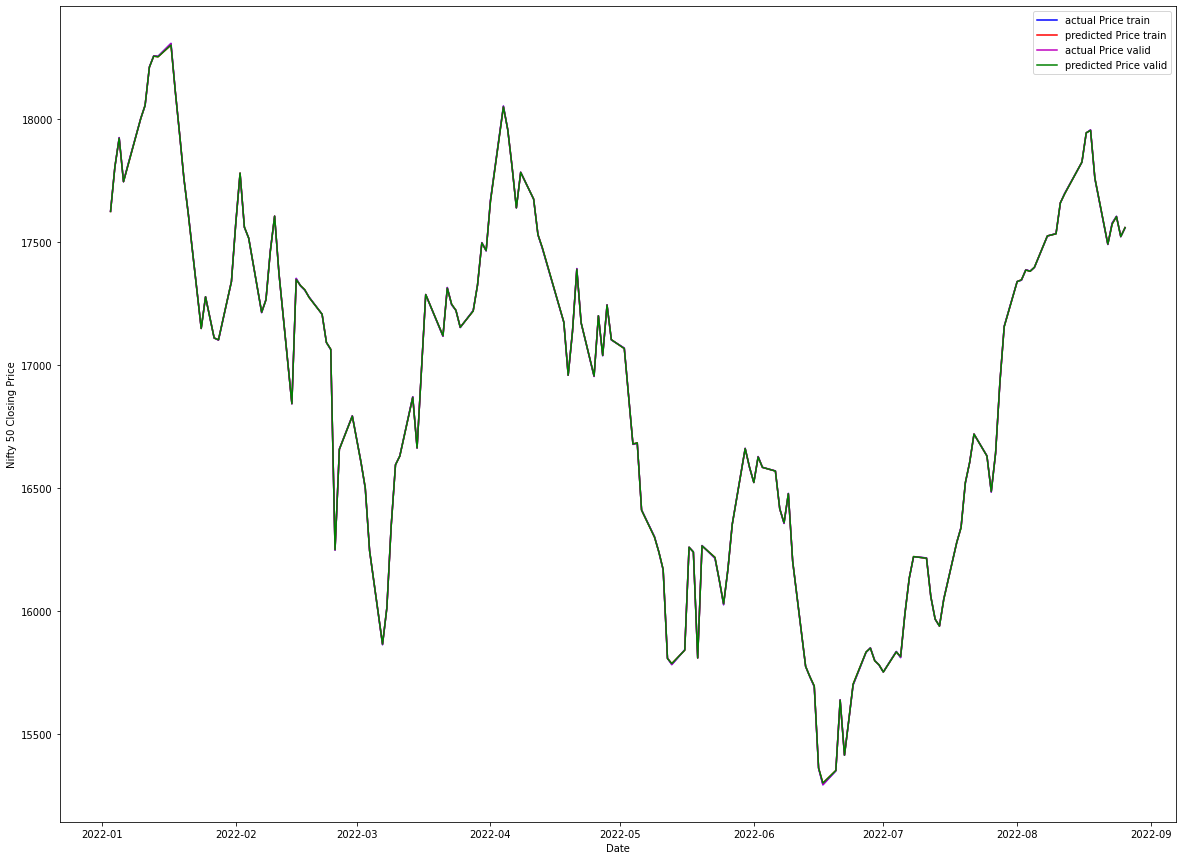

In [ ]:
predicted_results_v = xgb.predict(X_valid3)
predicted_results_t = xgb.predict(X_train3)
predicted_results_v= predicted_results_v.reshape(-1, 1)
predicted_results_t= predicted_results_t.reshape(-1, 1)
predicted_results_v = scaler1.inverse_transform(predicted_results_v)
predicted_results_t = scaler.inverse_transform(predicted_results_t)
plt.figure(figsize=(20,15))
plt.plot(X_train2.index,list(y_trainn),label="actual Price train",color='b')
plt.plot(X_train2.index,list(predicted_results_t),label="predicted Price train",color='r')
plt.plot(X_valid2.index,list(y_validn),label="actual Price valid",color='m')
plt.plot(X_valid2.index,list(predicted_results_v),label="predicted Price valid",color='g')

plt.xlabel('Date')
plt.ylabel('Nifty 50 Closing Price')
plt.legend()
plt.show()

In [ ]:
import plotly.graph_objects as go

import pandas as pd
from datetime import datetime

df = pd.read_excel('data (2).xlsx')

fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

In [ ]:
X_train

,Date,Open,High,Low,Shares Traded,Turnover,Open_mean_lag4,Open_std_lag7,High_mean_lag4,High_std_lag7,Low_mean_lag4,Low_std_lag7,month,day,day_of_week
Date,,,,,,,,,,,,,,,
2022-01-03,2022-01-03,17387.15,17646.65,17383.30,200456430,16181.36,17210.912109,107.109695,17300.261719,104.598923,17180.662109,152.019592,1,3,0
2022-01-04,2022-01-04,17681.40,17827.60,17593.55,247437472,18604.16,17263.300781,134.337357,17399.363281,178.154724,17236.199219,189.507019,1,4,1
2022-01-05,2022-01-05,17820.10,17944.70,17748.85,251460038,23737.31,17378.625000,227.124100,17534.775391,251.821976,17340.425781,233.424591,1,5,2
2022-01-06,2022-01-06,17768.50,17797.95,17655.55,236454824,22643.82,17533.287109,258.395203,17704.937500,288.165009,17491.050781,237.741653,1,6,3
2022-01-07,2022-01-07,17797.60,17905.00,17704.55,239338015,21447.89,17664.287109,273.400879,17804.224609,277.789398,17595.312500,245.675034,1,7,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-22,2022-08-22,17682.90,17690.05,17467.35,287559133,19605.44,17882.636719,142.504395,17941.425781,161.694778,17790.050781,144.736267,8,22,0
2022-08-23,2022-08-23,17357.35,17625.55,17345.20,285616338,20365.80,17854.062500,117.831818,17904.162109,132.810730,17715.875000,137.871307,8,23,1
2022-08-24,2022-08-24,17525.45,17623.65,17499.25,261953239,17819.88,17726.363281,204.923950,17819.062500,150.844589,17593.837891,191.512604,8,24,2


In [ ]:
xgb.predict([17373.00,17379.35,17184.95,219496063,18493.54,17425.500000,189.747696,17475.312500,133.749405,17294.800781,145.321899,12,16,3
])

array([0.97359896], dtype=float32)

In [ ]:
y_train

Date
2022-01-03    17625.70
2022-01-04    17805.25
2022-01-05    17925.25
2022-01-06    17745.90
2022-01-07    17812.70
                ...   
2022-08-22    17490.70
2022-08-23    17577.50
2022-08-24    17604.95
2022-08-25    17522.45
2022-08-26    17558.90
Name: Close, Length: 162, dtype: float64

In [ ]:
from numpy import asarray
from pandas import read_csv
row = [0.00632,18.00,2.310,0,0.5380,6.5750,65.20,4.0900,1,296.0,15.30,396.90,4.98,3]
new_data = asarray([row])
# make a prediction
#using the model
yhat = xgb.predict(new_data)
print(yhat)

[0.9327907]
